# Setup

In [14]:
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

report_file = '/var/dws/wafer/wafer_test_1.xlsx'

bin_nm = 'Bin26'
filter_col = 'Op.'
filter_value = 'CP2'
detcol_nm = 'Tester'
detcol2_nm = 'P/C'

xlabel = 'Tester (6 as STDX06A, 50 as STDX50A)'
xlabel = 'x'
ylabel = 'P/C (1 as SB776-1-01, 11 as SB776-1-11)'
ylabel = 'y'
zlabel = 'Fail%'
zlabel = ''


def add_bin_avg(table, attr, bin_avg):
    bin_curr_avg = 0
    if attr in output:
        bin_curr_avg = table[attr]
    table[attr] = bin_curr_avg + bin_avg
    

def sum_bin(row):
    bin_sum = 0
    for j in row.index:
        if 'Bin' in j:
            bin_sum = bin_sum+row[j]
    return bin_sum

# Load Data

In [15]:
sheet = pd.read_excel(io=report_file, header=8)

In [16]:
output={}

for i in sheet.index.values:
    row_data=sheet.loc[i]
    sum = sum_bin(row_data)
    # if row_data[filter_col] == filter_value:
    bin_count = row_data[bin_nm]
    add_bin_avg(output, row_data[detcol_nm]+'_'+row_data[detcol2_nm], bin_count/sum)

# output = sorted(output.items(), key=lambda d: d[0])

# Draw

x cord: [6, 48, 48, 6, 49, 49, 49, 50, 6, 6, 49, 6, 50, 6, 50, 6, 49, 48, 45, 48, 49, 49, 49, 45, 37, 6, 6, 37, 34, 48, 48, 34, 34, 37, 49, 48, 37, 37, 34]
y cord: [9, 10, 9, 12, 12, 4, 10, 10, 10, 8, 1, 4, 12, 2, 11, 11, 7, 2, 7, 12, 9, 6, 3, 11, 3, 5, 6, 8, 2, 4, 7, 8, 11, 9, 5, 6, 10, 4, 9]
z cord: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
width: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
depth: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
height: [0.34665697674418616, 0.029069767441860465, 0.09265988372093023, 0.4000726744186048, 0.6965843023255817, 0.11482558139534883, 0.43386627906976755, 0.08975290697674418, 0.1188226744186047, 0.2623546511627907, 0.2005813953488373, 0.0843023255813

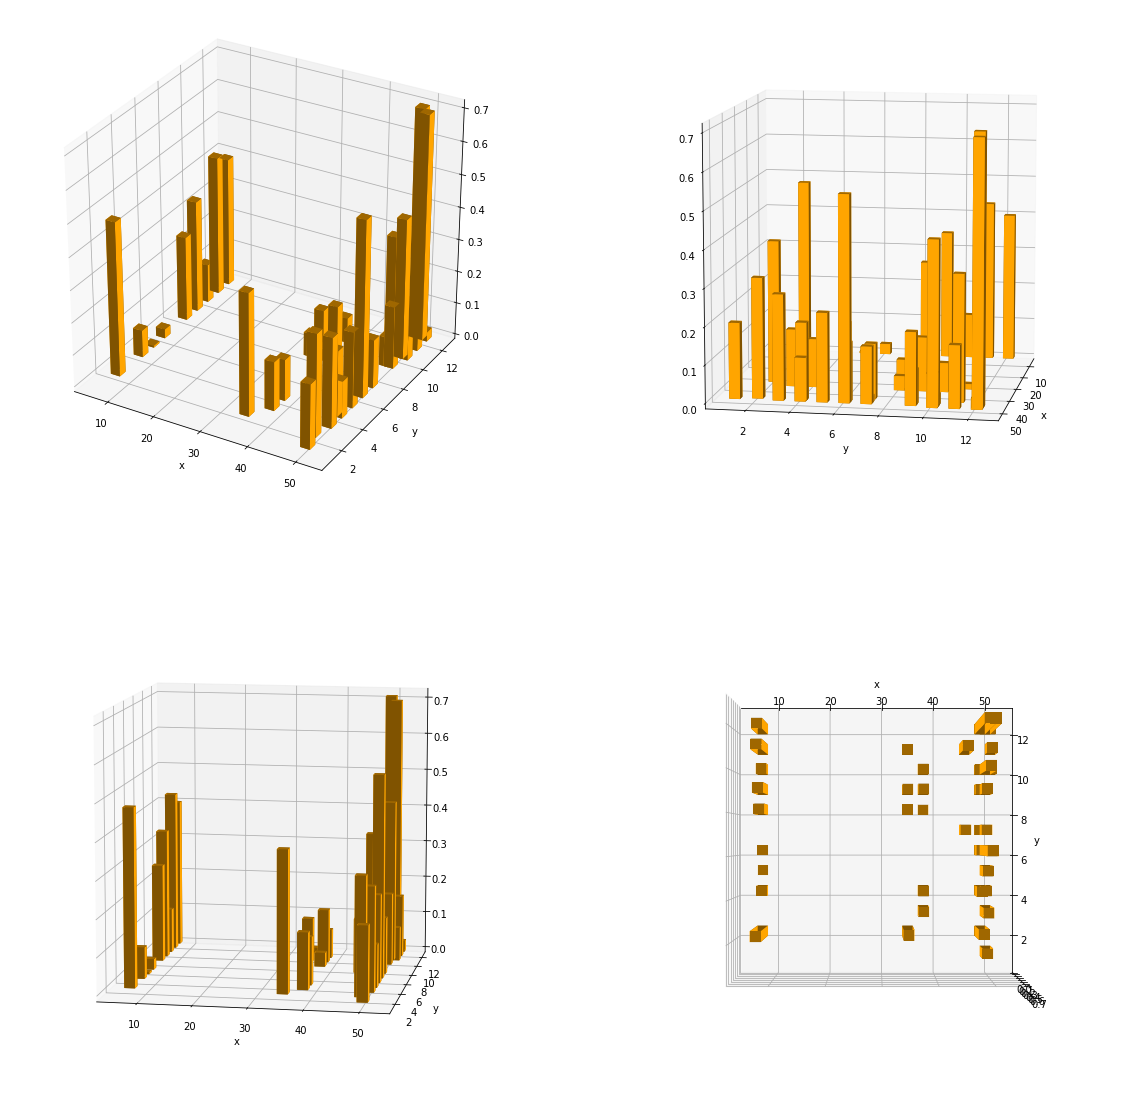

In [17]:
X=[]
Y=[]
Z=[]
dx=[]
dy=[]
dz=[]

'''
X = [1,2,3]  # coordinates of each bar
Y = [2,4,0]  # coordinates of each bar
Z = [0,0,0]  # coordinates of each bar
dx = [0.5, 0.5, 0.5]  #width of each bar
dy = [0.5, 0.5, 0.5]  #depth of each bar
dz = [5, 4, 7]        #height of each bar
'''

for k, v in output.items():
    x = int(re.sub('[\D_]+', '', k.split('_')[0]))
    y = int(k.split('_')[1].split('-')[2])
    X.append(x)
    Y.append(y)
    Z.append(0)
    dx.append(2)
    dy.append(0.5)
    dz.append(v)

print("x cord: "+str(X))
print("y cord: "+str(Y))
print("z cord: "+str(Z))
print("width: "+str(dx))
print("depth: "+str(dy))
print("height: "+str(dz))


fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(221, projection='3d') 
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
ax.bar3d(X, Y, Z, dx, dy, dz, color = 'orange')

ax = fig.add_subplot(222, projection='3d') 
ax.view_init(elev=10,azim=10)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
ax.bar3d(X, Y, Z, dx, dy, dz, color = 'orange')

ax = fig.add_subplot(223, projection='3d') 
ax.view_init(elev=10,azim=-80)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
ax.bar3d(X, Y, Z, dx, dy, dz, color = 'orange')

ax = fig.add_subplot(224, projection='3d') 
ax.view_init(elev=90,azim=-90)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
ax.bar3d(X, Y, Z, dx, dy, dz, color = 'orange')

fig.savefig('plot.png')